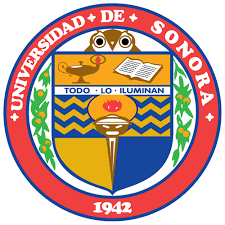



# **Actividad 11**

*Solución Numérica de la Ecuación de Onda*

Iveth Rocio Navarro Lopez



---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use('bmh')

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable



---
**Actividad 11.1**


In [ ]:
def solver(b,I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    k = dt
    C1 = (1/(1+(b*k/2)))
    C2 = C**2 
    C3 = b*k/2
    C4 = (1/(1+C1*C3+C1))
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) 
    u_1 = zeros(Nx+1) 
    u_2 = zeros(Nx+1)
    
    import time; 
    t0 = time.process_time()

    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    n = 0
    for i in range(1, Nx):
       u[i] = 2*C1*C4*(u_1[i]) + dt*V(x[i]) + C4*(C1*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1])) + dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefiniendo variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = -1*C1*u_2[i] + 2*C1*u_1[i] + C1*(C3*u_2[i] + C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1])) + dt**2*f(x[i], t[n])
        # Definiendo la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefiniendo variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

u.spahe: (501,)
x.shape: (501,)
t.shape: (12501,)
CPU time: 26.136157086
dt = T/len(user_data[]): 1.999840012798976e-05


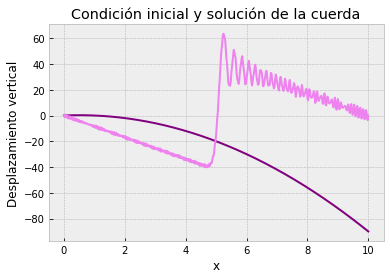

In [ ]:
# Ejemplo de una cuerda vibrante L=10, t=(0,0.25), c=100m/s
b = 0.5 
I = lambda x: x*(1-x) 
V = None 
f = None 
c = 100 
L = 10 
Nx = 500 
C = 0.1 
T = 0.25

user_data = {}
u, x, t, cpu_time = solver(b, I, V, f, c, L, Nx, C, T, user_action=user_action)

print('u.spahe:', u.shape)
print('x.shape:', x.shape)
print('t.shape:', t.shape)
print('CPU time:',cpu_time)
print('dt = T/len(user_data['u']):', 0.25/len(user_data['u']))

I = x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición inicial y solución de la cuerda')
plt.plot(x,I,color='purple')
plt.plot(x,u,color='violet')



---
**Actividad 11.2**


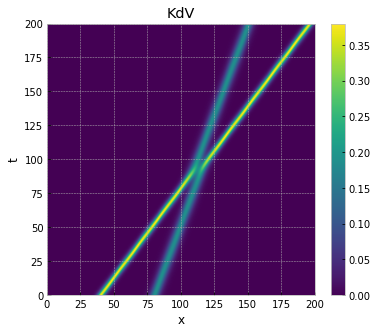

In [ ]:
# Definiremos una funcion para resolver la ecuacion de onda:
def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    x = linspace(0, L, Nx+1) # Esto es para hacer una malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Esto es para hacer una malla en t
    C2 = C**2 # Asi simplificaremos la respuesta
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Esta sera la solucion para el nuevo tiempo
    u_1 = zeros(Nx+1) # La solucion un paso atras en el tiempo
    u_2 = zeros(Nx+1) # La solucion un paso adelante en el tiempo
    
    import time; 
    t0 = time.process_time()

    # Ahora vamos a poner la condicion inciial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])   #Esta es la condicion en t0

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Primer paso:
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0  # Condiciones de los extremos
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos algunas variables:
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza valores en t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Condicion de la frontera:
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables de nuevo
        u_2[:], u_1[:] = u_1, u

    cpu_time = t0 - time.process_time()
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

#Ejemplo 2: Solucion de la ecuacion de Koteweg-De Vries en un dominio periodico:

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""

    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calculando el lado derecho de la ecuacion
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    L = 200.0
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definiendo las condiciones iniciales:
    x01 = 0.2*L
    x02 = 0.4*L
    c1= 0.76
    c2= 0.38
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) 
    
    # Definiendo el tamano del tiempo
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('KdV')
    plt.show()

**Actividad 11.3**

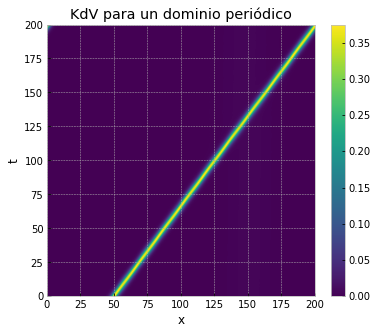

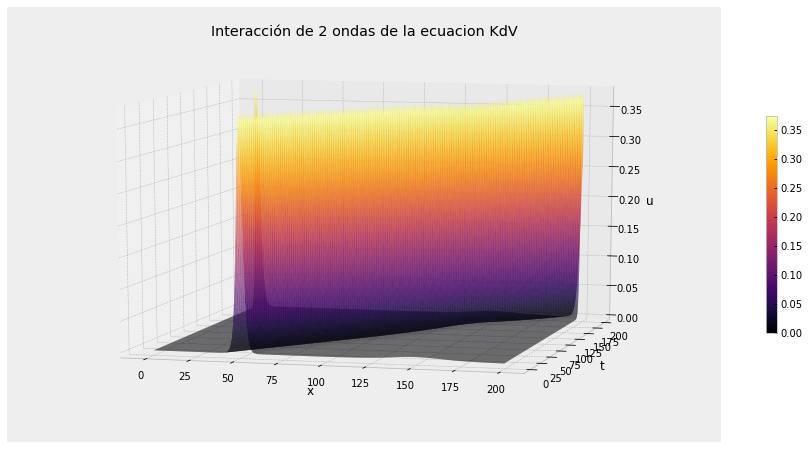

In [ ]:

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calculando el lado derecho:
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Definiendo el tamano del dominio y creando una malla discretizada:
    L = 200.0

    Nx = 256

    dx = L / (Nx - 1.0) 
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) 

    # Definiendo las condiciones iniciales:
    x01 = 0.25*L
    x02 = 0.75*L
    c1= 0.75
    c2= 0.01
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2)
    
    # Definiendo el tamaño del tiempo:
    # Tiempo final:
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('KdV para un dominio periódico')
    
    plt.show()

    # Gráfica 3D:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, t)
ax.plot_surface(SX, ST, sol, cmap='inferno', rstride=1, cstride=1, alpha=0.75)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='inferno')
m.set_array(sol)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=10, azim=-75)
ax.set_title('Interacción de 2 ondas de la ecuacion KdV')
plt.show()

**Actividad 11.4**

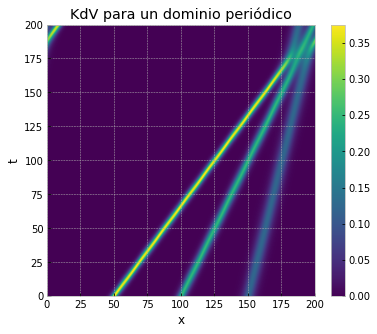

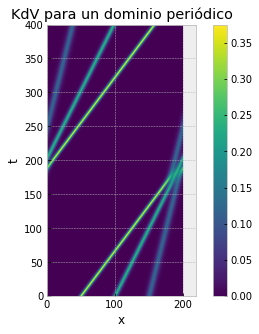

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


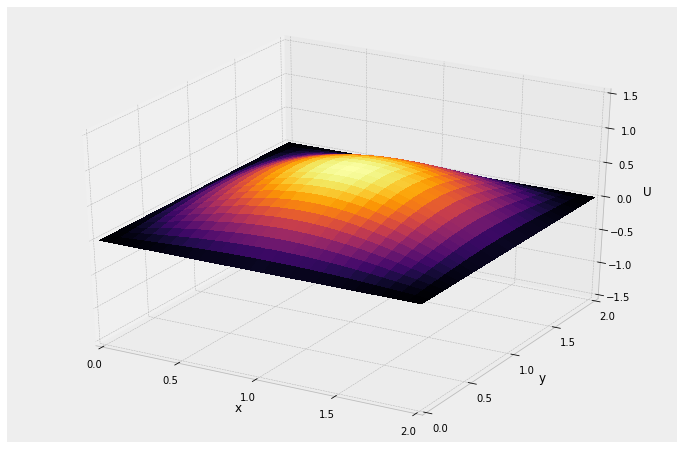

paso: 10.0 t= 0.285


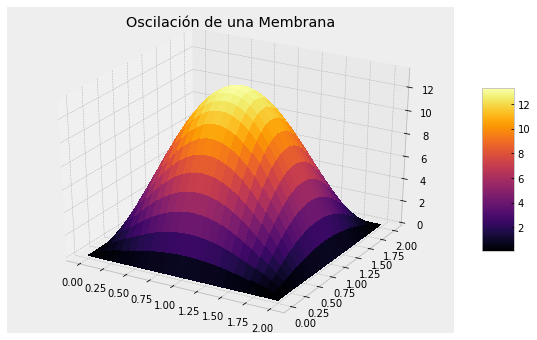

paso: 20.0 t= 0.585


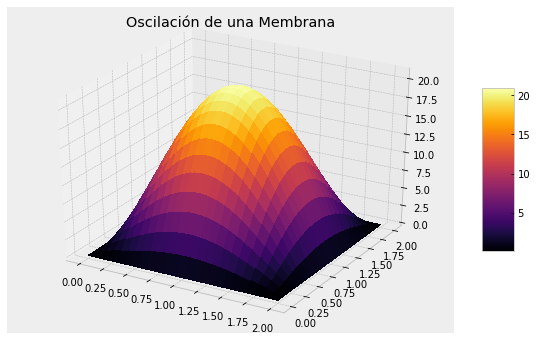

paso: 30.0 t= 0.885


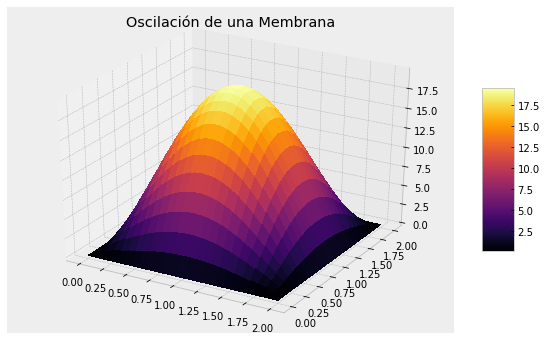

paso: 40.0 t= 1.185


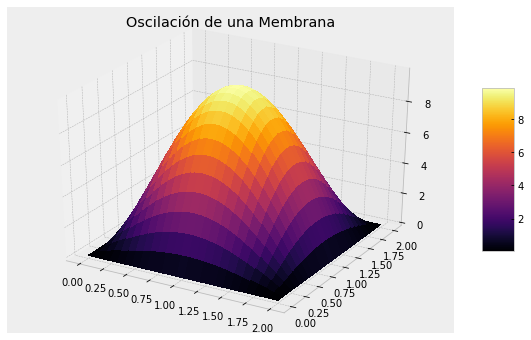

paso: 50.0 t= 1.4849999999999999


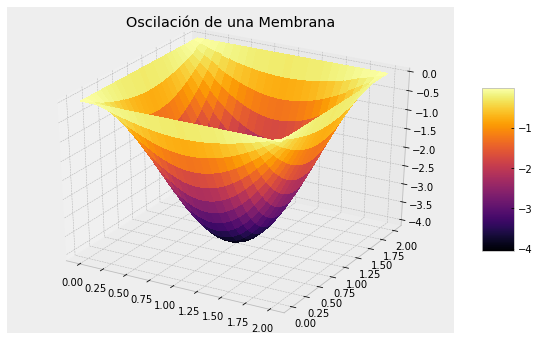

paso: 60.0 t= 1.785


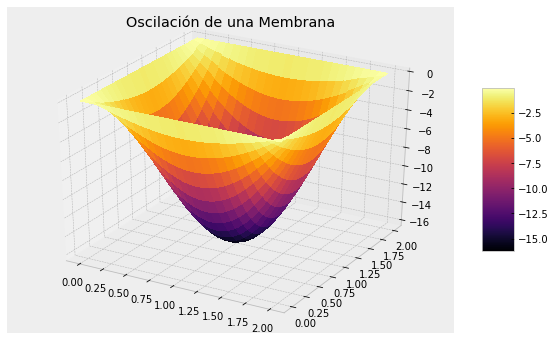

paso: 70.0 t= 2.085


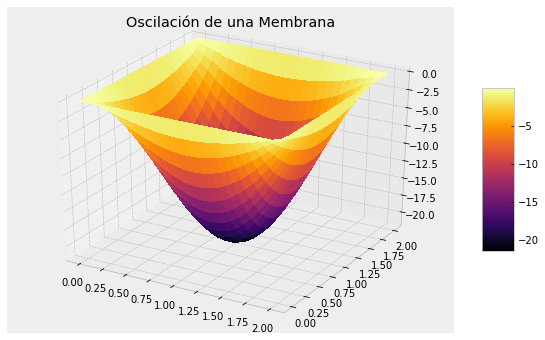

paso: 80.0 t= 2.385


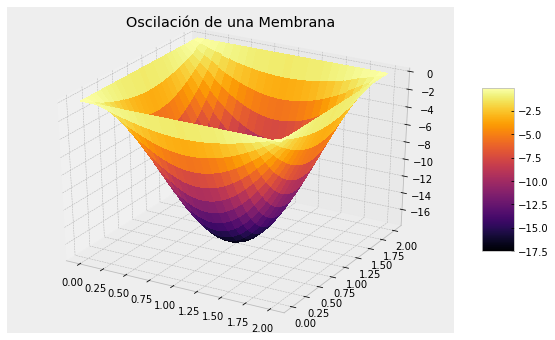

paso: 90.0 t= 2.685


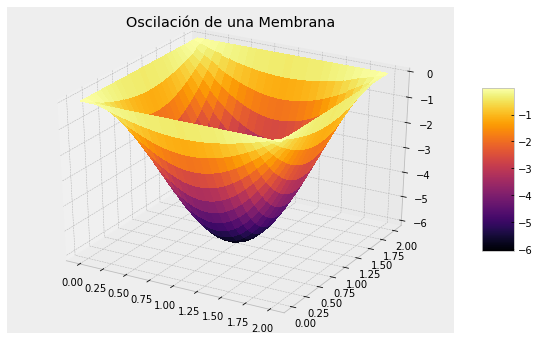

paso: 100.0 t= 2.985


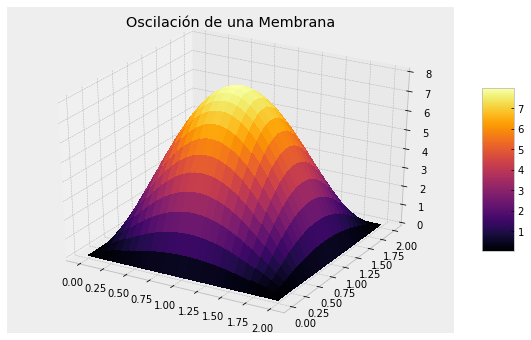

In [ ]:
def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calculando el lado derecho:
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    L = 200.0
    Nx = 256

    dx = L / (Nx - 1.0) 
    x = np.linspace(0, (1-1.0/Nx)*L, Nx)

    # Definiendo las condiciones iniciales:
    x01 = 0.25*L
    x02 = 0.5*L
    x03 = 0.75*L
    c1= 0.75
    c2= 0.5
    c3= 0.25
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) + kdv_exact(x-x03,c3)
    
    # Definiendo el tamano del tiempo:
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('KdV para un dominio periódico')
    plt.show()

    T = 400
    Nt = 1002
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    #Aqui no movemos porque solo lo ajsuta a la escala
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis([0,L+20,0,400])
    plt.title('KdV para un dominio periódico')
    plt.show()

#Ejemplo 3:

class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(np.pi*r/2)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.inferno, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Haciendo las graficas cada 15 pasos:
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('inferno')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.inferno, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()


def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() 
    plt.show()
    
if __name__ == "__main__":
    main()

**Actividad 11.6**

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


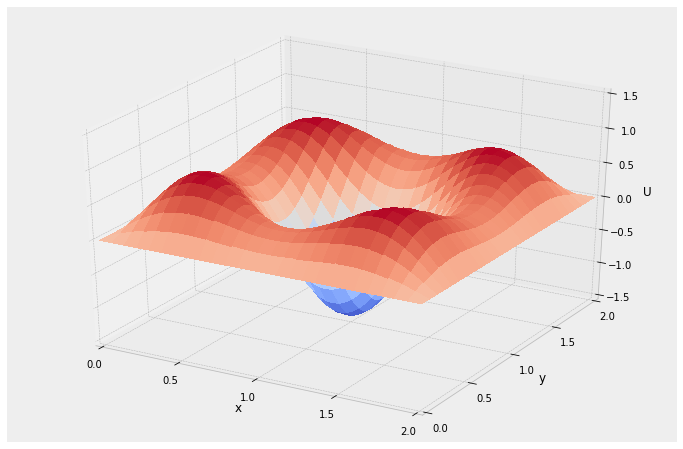

paso: 10.0 t= 0.285


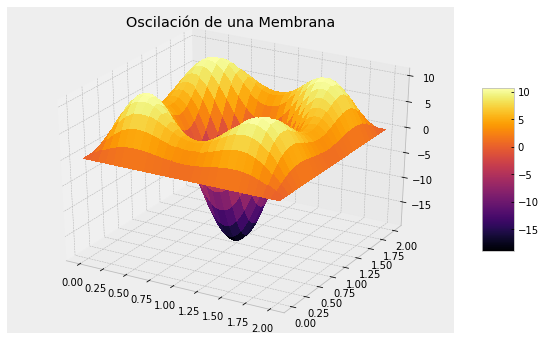

paso: 20.0 t= 0.585


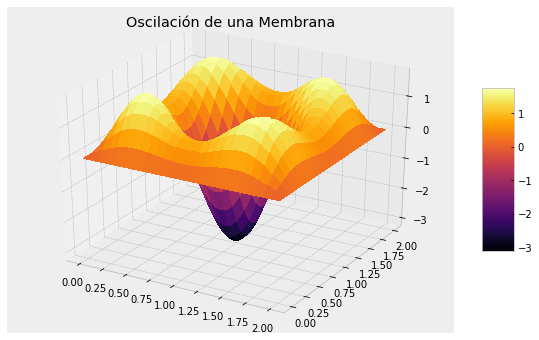

paso: 30.0 t= 0.885


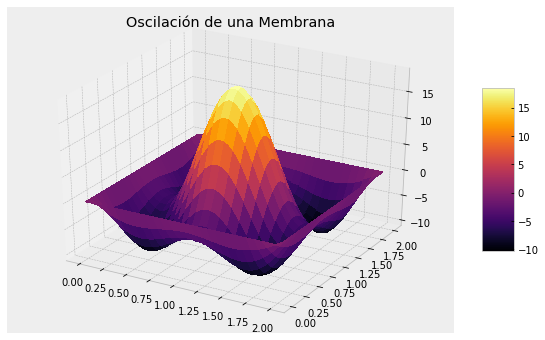

paso: 40.0 t= 1.185


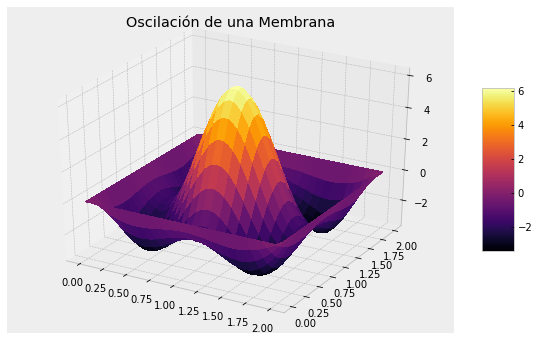

paso: 50.0 t= 1.4849999999999999


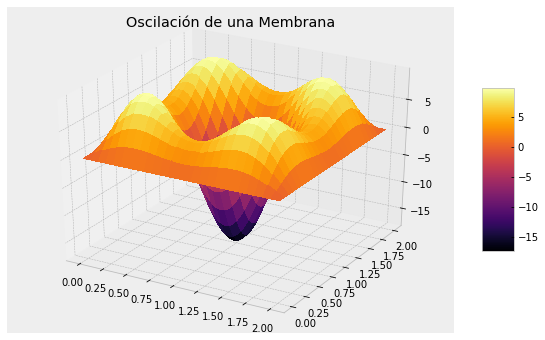

paso: 60.0 t= 1.785


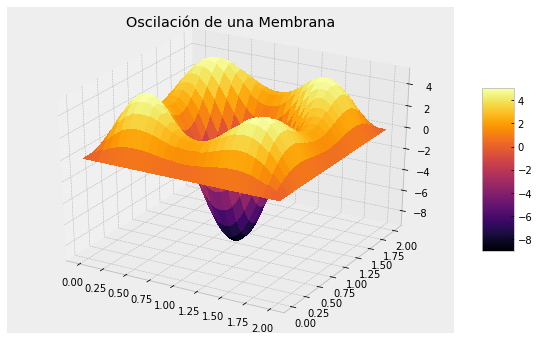

paso: 70.0 t= 2.085


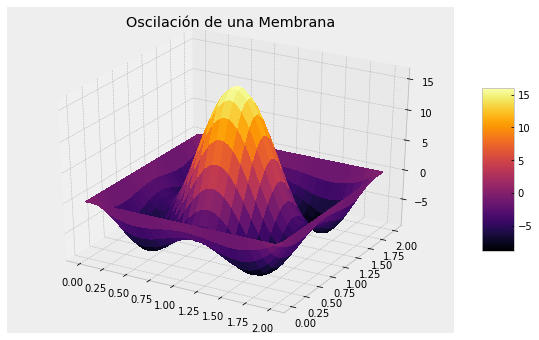

paso: 80.0 t= 2.385


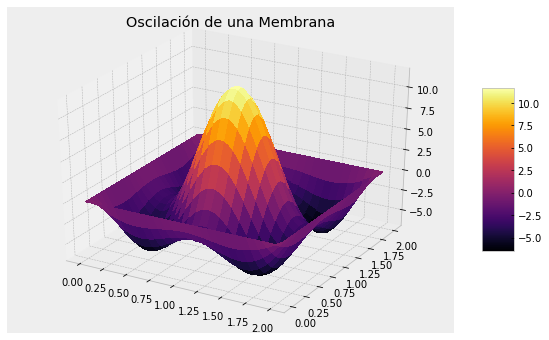

paso: 90.0 t= 2.685


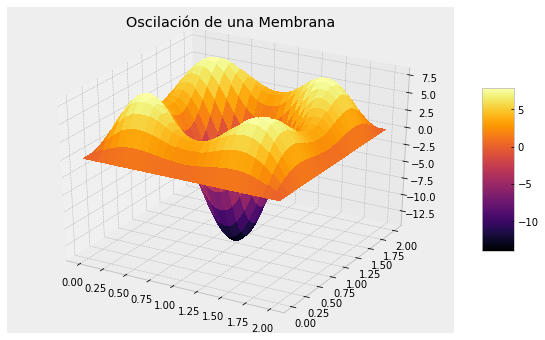

paso: 100.0 t= 2.985


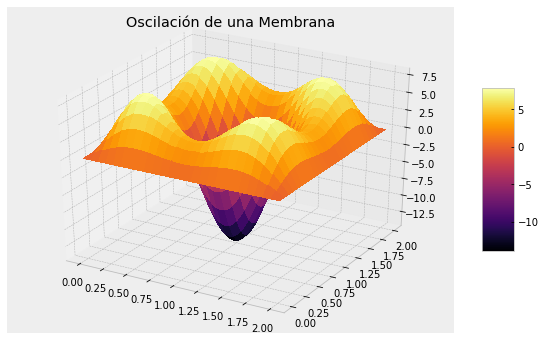

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline


class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(3*np.pi*r/2)*np.sin(np.pi*s/2)\
        +np.sin(np.pi*r/2)*np.sin(3*np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('inferno')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.inferno, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()


def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate()
    plt.show()
    
if __name__ == "__main__":
    main()